In [19]:
import numpy as np

class KNN:
    def __init__(self, K , X_train, y_train, y_name):
        self.K = K
        self.X = X_train
        self.y = y_train
        self.y_name = y_name
        self.idx = []
        self.distance_matrix = []
        
    def Calculate_distance(self, X1, X2):
        return ((X1 - X2)**2).sum(1)**0.5

    def get_nearest_k(self, X_test):
        # 거리계산된 배열, y와 1:1 매칭
        self.distance_matrix = self.Calculate_distance(self.X, X_test)
        # K번째로 작은 수
        KminusOne = (np.sort(self.distance_matrix)[self.K - 1])
        # 가장작은 k개의 인덱스 번호
        self.idx = np.where(self.distance_matrix <= KminusOne)
        
    def majority_vote(self):
        # label 배열로 변환
        label = np.bincount(self.y[self.idx], minlength = self.y_name.shape[0])
#         print(label)
        # 가장 많은 label 구하기
        Max = np.argmax(label)
        # 꽃 이름?
        return self.y_name[Max]
    
    def weighted_majority_vote(self):
        # 가중치 배열생성 1 / (distance_matrix + [1])
        arr = 1 / (self.distance_matrix[self.idx] + [1] )
        
        # arr에 각 idx에 매칭되는 y_train 
        yarr = self.y[self.idx]
        
        # 가중치들의 합을 계산
        result = np.zeros(self.y_name.shape[0])
        for i in range(self.K):
            result[yarr[i]] += arr[i]
        # 가중치 합이 가장 큰 값의 꽃 이름?    
#         print(result)
        return self.y_name[np.argmax(result)]
            
    def show_dim(self):
        print("Input Dimension: ",self.X.shape)
        print("Output Dimension: ",self.y.shape)
        
    def reset(self):
        self.idx = []
        self.distance_matrix = []
        





        

Input Dimension:  (140, 4)
Output Dimension:  (140,)
k =  3 , majority_vote
Test Data:  0  Computed class:  setosa ,	True class:  setosa
Test Data:  1  Computed class:  setosa ,	True class:  setosa
Test Data:  2  Computed class:  setosa ,	True class:  setosa
Test Data:  3  Computed class:  versicolor ,	True class:  versicolor
Test Data:  4  Computed class:  versicolor ,	True class:  versicolor
Test Data:  5  Computed class:  versicolor ,	True class:  versicolor
Test Data:  6  Computed class:  virginica ,	True class:  virginica
Test Data:  7  Computed class:  versicolor ,	True class:  virginica
Test Data:  8  Computed class:  virginica ,	True class:  virginica
Test Data:  9  Computed class:  virginica ,	True class:  virginica
k =  3 , weighted_majority_vote
Test Data:  0  Computed class:  setosa ,	True class:  setosa
Test Data:  1  Computed class:  setosa ,	True class:  setosa
Test Data:  2  Computed class:  setosa ,	True class:  setosa
Test Data:  3  Computed class:  versicolor ,	True 

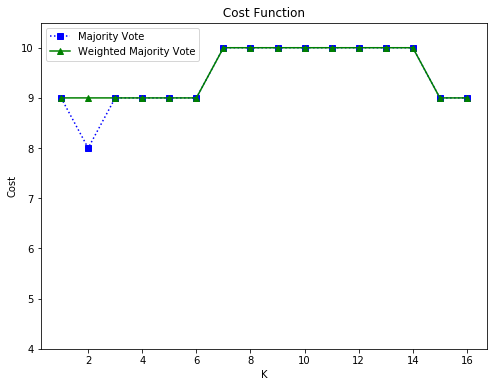

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# from knn import KNN

iris = load_iris()
# print(iris)

X = iris.data#[:, :2]  # iris data input

# y의 label을 두개로 하고싶다면
# y = np.where(iris.target==2, 0, iris.target) 
y = iris.target # iris target (label)

y_name = iris.target_names # label 2개로 할 땐 [:2] 붙여주자
# print(y_name)

# Use 14/15 for training & 1/14 for testing
l = 15
for_test = np.array([i%l == (l-1) for i in range(y.shape[0])])
for_train = ~for_test

# for training data (X, y)
X_train = X[for_train]
y_train = y[for_train]

# for testing data (X, y)
X_test = X[for_test]
y_test = y[for_test]
def KNN_Classification(K, X_train, y_train, y_name):
    knn_iris = KNN(K, X_train, y_train, y_name)
    knn_iris.show_dim()
    print("k = ", K, ", majority_vote")
    for i in range(y_test.shape[0]):
        knn_iris.get_nearest_k(X_test[i])
        print("Test Data: ", i, " Computed class: ", knn_iris.majority_vote(),
             ",\tTrue class: ", y_name[y_test[i]])
        knn_iris.reset()

    print("k = ", K, ", weighted_majority_vote")
    for i in range(y_test.shape[0]):
        knn_iris.get_nearest_k(X_test[i])
        print("Test Data: ", i, " Computed class: ", knn_iris.weighted_majority_vote(),
             ",\tTrue class: ", y_name[y_test[i]])
        knn_iris.reset()
    print("")
KNN_Classification(3, X_train, y_train, y_name)
KNN_Classification(5, X_train, y_train, y_name)
KNN_Classification(10, X_train, y_train, y_name)

''' Cost Function Plotting '''
MVError = []    #majority_vote 성공갯수 x/10
WMVError = []   #weighted_majority_vote 성공갯수 x/10
def Cost(K, X_train, y_train, y_name):
    knn_iris = KNN(K, X_train, y_train, y_name)
    err=0
    for i in range(y_test.shape[0]):
        knn_iris.get_nearest_k(X_test[i])
        CC = knn_iris.majority_vote()
        TC = y_name[y_test[i]]
        if CC == TC:
            err += 1 
        knn_iris.reset()
    MVError.append(err)
    
    err=0
    for i in range(y_test.shape[0]):
        knn_iris.get_nearest_k(X_test[i])
        CC = knn_iris.weighted_majority_vote()
        TC = y_name[y_test[i]]
        if CC == TC:
            err += 1 
        knn_iris.reset()
    WMVError.append(err)
    
for K in range(1, 17):
    Cost(K, X_train, y_train, y_name)
X = np.arange(1, 17)
plt.figure(2, figsize=(8, 6))
plt.ylim(4, 10.5)
plt.plot(X,MVError,'bs:', X, WMVError, 'g^-')
plt.xlabel('K')
plt.ylabel('Cost')
plt.title(" Cost Function ")
plt.legend(["Majority Vote","Weighted Majority Vote"])
plt.show()

[9, 8, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9]
[9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9]


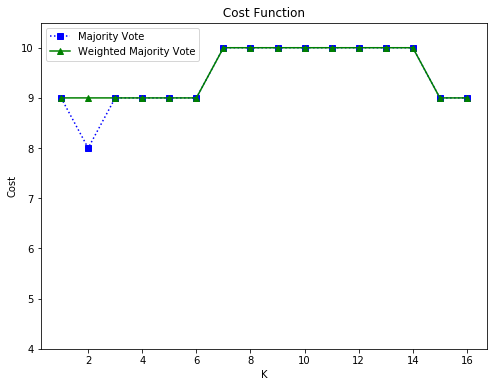

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
# from knn import KNN
MVError = []
WMVError = []
# K 설정 후 training data로 KNN 알고리즘 수행
def PlayKNN(K, X_train, y_train, y_name):
    knn_iris = KNN(K, X_train, y_train, y_name)
#     knn_iris.show_dim()
    
#     print("k = ", K,", majority_vote")
    err=0
    for i in range(y_test.shape[0]):
        knn_iris.get_nearest_k(X_test[i])
        CC = knn_iris.majority_vote()
        TC = y_name[y_test[i]]
#         print("Test Data: ", i, " Computed class: ", CC,
#              ",\tTrue class: ", TC) 
        if CC == TC:
            err += 1 
        knn_iris.reset()
    MVError.append(err)
    
#     print("k = ", K,", weighted_majority_vote")
    err=0
    for i in range(y_test.shape[0]):
        knn_iris.get_nearest_k(X_test[i])
        CC = knn_iris.weighted_majority_vote()
        TC = y_name[y_test[i]]
#         print("Test Data: ", i, " Computed class: ", knn_iris.weighted_majority_vote(),
#              ",\tTrue class: ", y_name[y_test[i]])
        if CC == TC:
            err += 1 
        knn_iris.reset()
    WMVError.append(err)

iris = load_iris()
# print(iris)

X = iris.data#[:, :2]  # iris data input

# y의 label을 두개로 하고싶다면
# y = np.where(iris.target==2, 0, iris.target) 
y = iris.target # iris target (label)

y_name = iris.target_names # label 2개로 할 땐 [:2] 붙여주자
# print(y_name)

# Use 14/15 for training & 1/14 for testing
l = 15
for_test = np.array([i%l == (l-1) for i in range(y.shape[0])])
for_train = ~for_test

# for training data (X, y)
X_train = X[for_train]
y_train = y[for_train]

# for testing data (X, y)
X_test = X[for_test]
y_test = y[for_test]



In [2]:
import math
import numpy as np
abc = np.array([[3,4,5,6],
                [1,2,3,4],
               [5,6,7,8],
                [7,6,7,12],
               [4,6,2,8],
               [1,6,7,8]])
abc1 = np.array([0,1,2,0,1,2])
aa = np.array([2,2,1,5])

abc2 = np.array([[1,2,3,4]])
print((((abc2[:,0] - aa[0])**2) + ((abc2[:,1] - aa[1])**2) + 
              ((abc2[:,2] - aa[2])**2) + ((abc2[:,3] - aa[3])**2))**0.5)
def euclidean_distance(X1, X2):
    x=0
    for i in range(X1.shape[1]):
        x += (X1[:,i] - X2[i])**2
    x = x**0.5
    matrix = (((X1[:,0] - X2[0])**2) + ((X1[:,1] - X2[1])**2) + 
              ((X1[:,2] - X2[2])**2) + ((X1[:,3] - X2[3])**2))**0.5
    return matrix
qwe = euclidean_distance(abc, aa)
re = (np.sort(qwe)[2])
print(qwe)
print(re)
idx = np.where(qwe <= re)
print("idx:",idx)
print(1 / (qwe[idx] + [1]))
arr = 1 / (qwe[idx] + [1])
print("abc1[idx]", abc1[idx])
yarr = abc1[idx]
sds = np.bincount(abc1[idx], minlength=3)
print(sds)
ds = np.argmax(sds)
print(ds)
arr = qwe[idx]

result = [0, 0, 0]
for i in range(3):
    result[yarr[i]] += arr[i]
np.argmax(result)

[2.44948974]
[ 4.69041576  2.44948974  8.36660027 11.22497216  5.47722558  7.87400787]
5.477225575051661
idx: (array([0, 1, 4], dtype=int64),)
[0.17573408 0.28989795 0.15438709]
abc1[idx] [0 1 1]
[1 2 0]
1


1